In [11]:
import os

print(os.path.abspath(os.curdir))

C:\Users\arez_\PycharmProjects\AMLS_19-20_Muhammad_Juzaimi_SN16072927\AMLS_19-20_SN16072927\Data


In [2]:
os.chdir('./AMLS_19-20_SN16072927')
# os.chdir('..')
print(os.path.abspath(os.curdir))

C:\Users\arez_\PycharmProjects\AMLS_19-20_Muhammad_Juzaimi_SN16072927\AMLS_19-20_SN16072927


In [12]:
from data_preprocessing import get_data_A2

tr_X_A2, te_X_A2, tr_Y_A2, te_Y_A2 = get_data_A2()


In [13]:
from sklearn import svm
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV
import pandas as pd

def SVM_A2(training_images, training_labels, test_images, test_labels):
    tuned_parameters = [{'kernel': ['linear'], 'C': [1, 10, 100]},
                        {'kernel': ['rbf'], 'gamma': [1e-3, 1e-4], 'C': [1, 10, 100]},
                        {'kernel': ['poly'], 'degree': [2, 3], 'C': [1, 10, 100]}
                        ]


    classifierA2 = GridSearchCV(svm.SVC(), tuned_parameters, n_jobs=-1)  # gridsearchCV use 3 k-fold by default
    classifierA2.fit(training_images, training_labels)
    classifierA2_best = classifierA2.best_estimator_
 
# default score of SVM is accuracy   
    print("Best SVM parameter:", classifierA2.best_params_)
    print("Best SVM score:", classifierA2.best_score_)

# print dataframe  
    results = pd.concat([pd.DataFrame(classifierA2.cv_results_["params"]), pd.DataFrame(classifierA2.cv_results_["mean_test_score"], columns=["Accuracy"])], axis=1)
       
# make prediction using the best classifier
    predA2 = classifierA2.best_estimator_.predict(test_images)
    
    return predA2, results, classifierA2_best


In [14]:
import time

starttime = time.time()
predA2, results, classifierA2_best = SVM_A2(tr_X_A2, tr_Y_A2, te_X_A2, te_Y_A2)
stoptime= time.time()
print(stoptime - starttime)

Best SVM parameter: {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
Best SVM score: 0.895903647491686


257.39663553237915


In [18]:
results

,C,kernel,gamma,degree,Accuracy
0,1,linear,NaN,NaN,0.889657
1,10,linear,NaN,NaN,0.888465
2,100,linear,NaN,NaN,0.889357
3,1,rbf,0.0010,NaN,0.895307
4,1,rbf,0.0001,NaN,0.884599
5,10,rbf,0.0010,NaN,0.895308
6,10,rbf,0.0001,NaN,0.894116
7,100,rbf,0.0010,NaN,0.893222
8,100,rbf,0.0001,NaN,0.895904
9,1,poly,NaN,2.0,0.774243


[0.92328358 0.91444444 0.91072395 0.90943351 0.90900335]
[0.88004458 0.89121842 0.89307578 0.89505201 0.89582467]


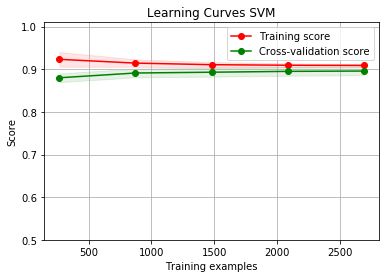

In [20]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
import matplotlib.pyplot as plt
import numpy as np

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    
    print(train_scores_mean)
    print(test_scores_mean)
    
    return plt

title = "Learning Curves SVM"

cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
estimator = classifierA2_best
X, y = tr_X_A2, tr_Y_A2
plot_learning_curve(estimator, title, X, y, (0.5, 1.01), cv=cv, n_jobs=-1)

plt.show()

# default test score for SVM is accuracy

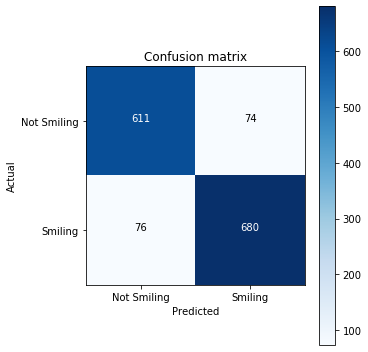

In [16]:
import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,normalize=False):
    plt.figure(figsize = (5,5))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion matrix')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    
dict_characters = {0: 'Not Smiling', 1: 'Smiling'}


confusion_mat = confusion_matrix(te_Y_A2, predA2)
plot_confusion_matrix(confusion_mat, classes = list(dict_characters.values()))

In [17]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Accuracy:", accuracy_score(te_Y_A2, predA2))
print("Precision:", precision_score(te_Y_A2, predA2))
print("Recall:", recall_score(te_Y_A2, predA2))
print("F1:", f1_score(te_Y_A2, predA2))

Accuracy: 0.8959056210964608
Precision: 0.9018567639257294
Recall: 0.8994708994708994
F1: 0.9006622516556292
